The following questions will be answered,

1. Where are the buoys located geographically?
2. What were the maximum, and average for each attribute of zonal wind, meridonal wind, and humidity?
3. Does the amount of movement of the buoy effect the reliability of the data?

In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.7 MB/s 
     |████████████████████████████████| 16.7 MB 4.1 MB/s 
     |████████████████████████████████| 6.3 MB 16.9 MB/s 


In [2]:
pip install iplantuml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for iplantuml: filename=IPlantUML-0.1.1-py2.py3-none-any.whl size=4911 sha256=4d976de422e674dd8de4a91156888693a16d3d5e04a3ddb8fb813c0e067dc173
  Stored in directory: /root/.cache/pip/wheels/cf/64/08/5bac65794ab011a60f7ef62413d3c430cf715345028f4b3914
Successfully built iplantuml


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import iplantuml
from shapely.geometry import Point, Polygon
from scipy import stats
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
#adding elnino data column names to pandas data frame
column_names = pd.read_csv("/content/gdrive/elnino.col", index_col = 0, delim_whitespace = False, header = None)
column_names = list(column_names.T)

#adding elnino data set to pandas dataframe 'df', and assigning column names from column_names dataframe
df = pd.read_csv("/content/gdrive/elnino", delim_whitespace = True, header = None, names = column_names)

# Remove extra space in columns
df.columns = [col.strip() for col in df.columns]

df

,buoy,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1,1,8.96,-140.32,-6.3,-6.4,83.5,27.32,27.57
1,1,2,8.95,-140.32,-5.7,-3.6,86.4,26.70,27.62
2,1,3,8.96,-140.32,-6.2,-5.8,83.0,27.36,27.68
3,1,4,8.96,-140.34,-6.4,-5.3,82.2,27.32,27.70
4,1,5,8.96,-140.33,-4.9,-6.2,87.3,27.09,27.85
...,...,...,...,...,...,...,...,...,...
777,59,10,-8.04,164.82,.,.,93.6,26.89,28.52
778,59,11,-8.04,164.82,.,.,92.3,27.62,28.44
779,59,12,-8.03,164.81,.,.,93.2,28.33,28.43
780,59,13,-8.04,164.82,.,.,95.5,28.44,28.51


In [23]:
# Rename specific column names

df.rename(columns={'buoy': 'Buoy', 'day': 'Day','latitude': 'Latitude',
                     'longitude': 'Longitude', 'zon.winds': 'Zonal Winds', 'mer.winds': 'Meridional Winds', 
                     'humidity': 'Humidity','air temp.':'Air Temp', 's.s.temp.': 'Sea Surface Temp'}, inplace=True)


# Remove missing values
df.replace('.',np.nan,inplace = True)
df

,Buoy,Day,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,1,1,8.96,-140.32,-6.3,-6.4,83.5,27.32,27.57
1,1,2,8.95,-140.32,-5.7,-3.6,86.4,26.70,27.62
2,1,3,8.96,-140.32,-6.2,-5.8,83.0,27.36,27.68
3,1,4,8.96,-140.34,-6.4,-5.3,82.2,27.32,27.70
4,1,5,8.96,-140.33,-4.9,-6.2,87.3,27.09,27.85
...,...,...,...,...,...,...,...,...,...
777,59,10,-8.04,164.82,NaN,NaN,93.6,26.89,28.52
778,59,11,-8.04,164.82,NaN,NaN,92.3,27.62,28.44
779,59,12,-8.03,164.81,NaN,NaN,93.2,28.33,28.43
780,59,13,-8.04,164.82,NaN,NaN,95.5,28.44,28.51


In [24]:
#describe pandas dataframe for logical conclusioning
df.describe(include='all')

,Buoy,Day,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
count,782.000000,782.000000,782.000000,782.000000,677,677,624,684,709
unique,NaN,NaN,NaN,NaN,113,121,179,321,328
top,NaN,NaN,NaN,NaN,-4.5,0.0,81.3,27.89,28.77
freq,NaN,NaN,NaN,NaN,21,17,11,10,9
mean,30.315857,7.226343,0.282698,-66.361189,NaN,NaN,NaN,NaN,NaN
std,17.107440,3.925513,5.050045,130.668776,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,-8.280000,-179.970000,NaN,NaN,NaN,NaN,NaN
25%,15.000000,4.000000,-4.980000,-154.990000,NaN,NaN,NaN,NaN,NaN
50%,31.000000,7.000000,0.000000,-124.890000,NaN,NaN,NaN,NaN,NaN
75%,45.000000,11.000000,4.970000,-94.950000,NaN,NaN,NaN,NaN,NaN


In [25]:
df_describe = df.groupby('Buoy').describe()
df_describe.head()

Day                                            Latitude            ...  \
     count mean      std  min   25%  50%    75%   max    count      mean  ...   
Buoy                                                                      ...   
1     13.0  7.0  3.89444  1.0  4.00  7.0  10.00  13.0     13.0  8.961538  ...   
2     13.0  7.0  3.89444  1.0  4.00  7.0  10.00  13.0     13.0  4.926923  ...   
3     14.0  7.5  4.18330  1.0  4.25  7.5  10.75  14.0     14.0  1.996429  ...   
4     13.0  7.0  3.89444  1.0  4.00  7.0  10.00  13.0     13.0 -0.016923  ...   
5     14.0  7.5  4.18330  1.0  4.25  7.5  10.75  14.0     14.0 -2.016429  ...   

                 Longitude                                                \
       75%   max     count        mean       std     min     25%     50%   
Buoy                                                                       
1     8.96  8.97      13.0 -140.326154  0.006504 -140.34 -140.33 -140.33   
2     4.93  4.93      13.0 -139.866154  0.007679 -139.88 -139.87 -139.87   
3     2.00  2.00      14.0 -139.967857  0.009750 -139.99 -139.97 -139.97   
4    -0.01 -0.01      13.0 -139.936923  0.004804 -139.94 -139.94 -139.94   
5    -2.01 -2.00      14.0 -139.964286  0.005136 -139.97 -139.97 -139.96   

                      
         75%     max  
Buoy                  
1    -140.32 -140.32  
2    -139.86 -139.85  
3    -139.96 -139.95  
4    -139.93 -139.93  
5    -139.96 -139.96  

[5 rows x 24 columns]

In [36]:
# How many buoys are there?

df_buoy_day = df.groupby(['Buoy']).mean()
print("There are ", df_buoy_day.shape[0], " buoys.")

There are  59  buoys.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


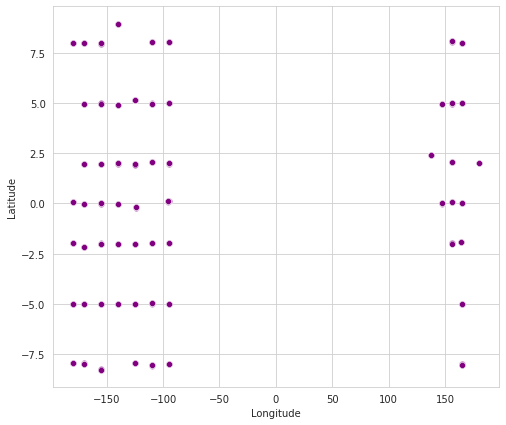

In [44]:
# Locating buoys based on Latitude and Longitude data
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(8,7))
sns.scatterplot('Longitude', 'Latitude', data=df, color='purple')

In [37]:
# Define a function 'get day' to find the max attribute per buoy
def get_day(buoy_number, attribute):
    """Retrieves the day of a particular buoy that recorded a maximum value for an attribute"""
    b = df[df.Buoy == buoy_number]
    b = b.sort_values(attribute, ascending = False).iloc[0, 1]
    return b

* The buoys 34, 19, 14 were considered to calculate the maximum value of each attribute valued based on humidity, and wind.  


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axi

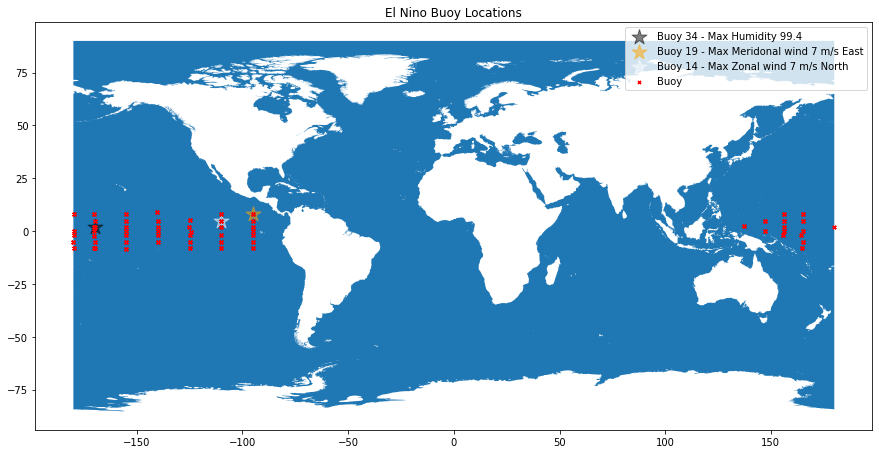

In [39]:
ocean_map = gpd.read_file('/content/gdrive/MyDrive/603-MachineLearning/Project/10m_physical/ne_10m_ocean.shp')
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip (df.Longitude, df.Latitude)]
df34 = df[df.Buoy == 34]
df19 = df[df.Buoy == 19]
df14 = df[df.Buoy == 14]
geometry2 = [Point(xy) for xy in zip (df34[df34.Day == get_day(34, 'Humidity')].Longitude, df34[df34.Day == get_day(34, 'Humidity')].Latitude)]
geometry3 = [Point(xy) for xy in zip (df19[df19.Day == get_day(19, 'Humidity')].Longitude, df19[df19.Day == get_day(19, 'Humidity')].Latitude)]
geometry4 = [Point(xy) for xy in zip (df14[df14.Day == get_day(14, 'Humidity')].Longitude, df14[df14.Day == get_day(14, 'Humidity')].Latitude)]

fig, ax = plt.subplots(figsize = (15, 15))
ocean_map.plot(ax = ax)
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df_34 = gpd.GeoDataFrame(df34[df34.Day == get_day(34, 'Humidity')], crs = crs, geometry = geometry2)
geo_df_19 = gpd.GeoDataFrame(df19[df19.Day == get_day(19, 'Meridional Winds')], crs = crs, geometry = geometry3)
geo_df_14 = gpd.GeoDataFrame(df14[df14.Day == get_day(14, 'Zonal Winds')], crs = crs, geometry = geometry4)
geo_df_34.plot(ax = ax, markersize = 250, color = "black", marker = "*", label = "Buoy 34 - Max Humidity 99.4", alpha = .5)
geo_df_19.plot(ax = ax, markersize = 250, color = "orange", marker = "*", label = "Buoy 19 - Max Meridonal wind 7 m/s East", alpha = .5)
geo_df_14.plot(ax = ax, markersize = 250, color = "white", marker = "*", label = "Buoy 14 - Max Zonal wind 7 m/s North", alpha = .5)
geo_df.plot(ax = ax, markersize = 10, color = "red", marker = "x", label = "Buoy")
plt.title("El Nino Buoy Locations")
ax.legend()

Exploratory analysis indicates Buoy # 34 had a the highest humidity of 99.4 degrees, where the groups average was 84.5 degrees. Buoy # 19 had a zonal wind of 7 meters per second in an eastern direction, where the average wind was 3.9 m/s in a western direction. Buoy # 14 had a zonal wind of 7.1 m/s north, and the average was .6 m/s south.

Divide into Hemisphere and Ocean

In [48]:
df2 = df.drop(columns = ['geometry'])

In [49]:
## Oceans and Hemispheres
# Oceans
df2['Ocean'] = df2['Longitude'] < 0.0
df2['Ocean'].replace([True,False],['West Pacific','East Pacific'],inplace= True)
# Hemisphere
df2['Hemisphere'] = df2['Latitude'] < 0.0
df2['Hemisphere'].replace([True,False],['South','North'],inplace=True)

In [51]:
df2

,Buoy,Day,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp,Ocean,Hemisphere
0,1,1,8.96,-140.32,-6.3,-6.4,83.5,27.32,27.57,West Pacific,North
1,1,2,8.95,-140.32,-5.7,-3.6,86.4,26.70,27.62,West Pacific,North
2,1,3,8.96,-140.32,-6.2,-5.8,83.0,27.36,27.68,West Pacific,North
3,1,4,8.96,-140.34,-6.4,-5.3,82.2,27.32,27.70,West Pacific,North
4,1,5,8.96,-140.33,-4.9,-6.2,87.3,27.09,27.85,West Pacific,North
...,...,...,...,...,...,...,...,...,...,...,...
777,59,10,-8.04,164.82,NaN,NaN,93.6,26.89,28.52,East Pacific,South
778,59,11,-8.04,164.82,NaN,NaN,92.3,27.62,28.44,East Pacific,South
779,59,12,-8.03,164.81,NaN,NaN,93.2,28.33,28.43,East Pacific,South
780,59,13,-8.04,164.82,NaN,NaN,95.5,28.44,28.51,East Pacific,South


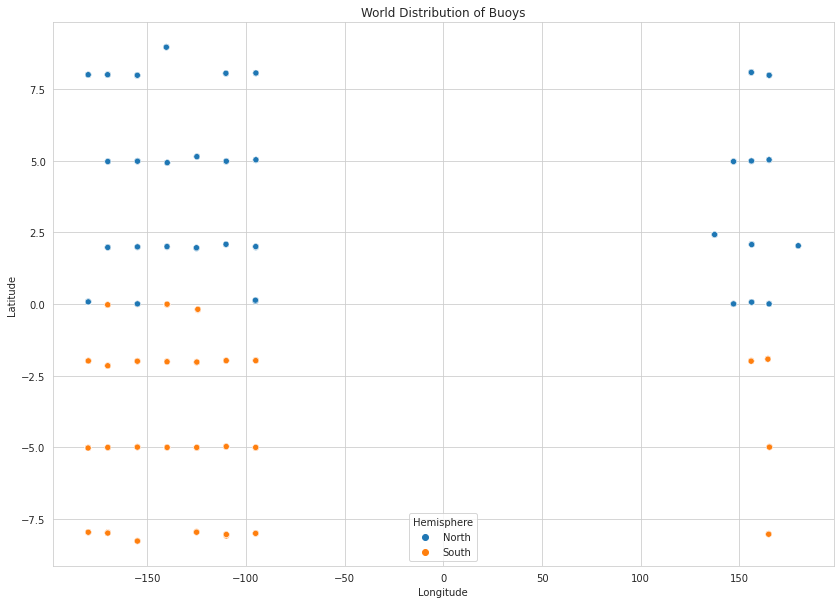

In [52]:
# Distribution of buoys using Hemisphere
import seaborn as sns

fig = plt.figure(figsize = (14,10))
plt.title('World Distribution of Buoys')
sns.scatterplot(x='Longitude',y= 'Latitude',data=df2, hue='Hemisphere')